In [1]:
# Подключим нужные для базовых операций библиотеки
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Подключим пакеты для использования OLS метода и тестов
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Подгрузим полезные функции
from utils import *

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

# Задача 1

Сгенерируем датасет.

Сгенерируйте датасет со случайными нормально распределенными величинами
×₁~N(μ1, 03), x₂~N(μ2, σž), corr(x₁, x₂) = –0.7, размер выборки № = 1000
Сгенерируйте зависимую переменную у по формуле:
где ε~№ (0, 02), ẞ₁≠0.

In [2]:
# Определим параметры выборки для задачи пропущенной переменной
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = -15.0,
    x1_std = 5.0,
    x2_mean = 50.0,
    x2_std = 6.0,
    corr_12 = -0.7,

    
    # Зададим параметры распределения ошибки
    e_mean = 0.0,
    e_std = 30.0,

    # Укажем размер выборки
    N = 1000,

    # Зададим действительные параметры модели
    beta0 = 100.0,
    beta1 = -3.3,
    beta2 = 7.7,
  
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

,x1,x2,y,e
0,-17.517432,52.590694,542.500521,-20.255348
1,-14.284480,56.463966,577.575759,-4.335560
2,-14.515839,48.236476,495.550537,-23.772598
3,-20.170540,60.423358,622.583793,-9.238846
4,-11.653843,48.297564,453.540482,-56.808440
...,...,...,...,...
995,-16.763134,55.944828,588.417928,2.324416
996,-18.586243,58.083738,616.311959,7.732576
997,-14.039661,53.949019,524.485513,-37.252817
998,-16.952895,48.250640,537.499773,10.025293


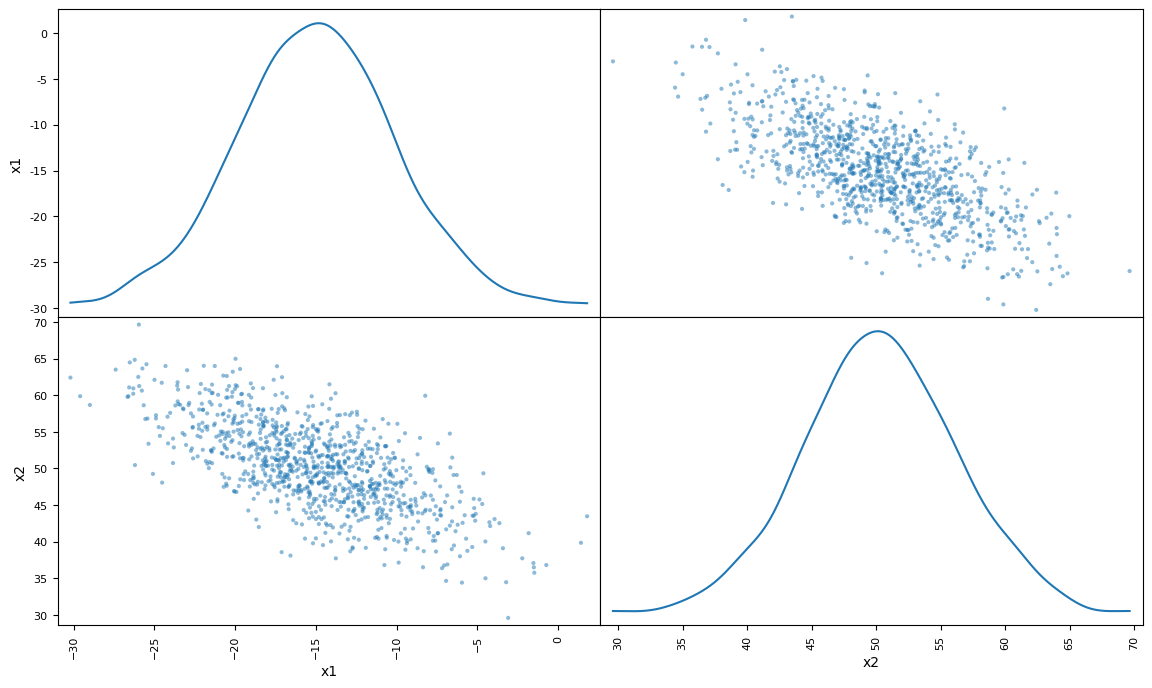

In [3]:
# Сгенерируем датасет с нормальным распределением в регрессоре
dt_missing_var = gen_data(y_type='simul', params=dist_params, seed=RANDOM_SEED)

display(dt_missing_var)

# Посмотрим на корреляции глазами
pd.plotting.scatter_matrix(dt_missing_var[['x1', 'x2']], figsize = (14,8), diagonal = 'kde');

(1 балл) Оцените модель методом МНК, выведите репорт с результатами модели,
дайте трактовку полученным оценкам коэффициентов модели В₁ и В2, проведите
тесты на нормальность распределения остатков и дайте свои комментарии

In [9]:
# Обучим модель и выведем результаты
dt_missing_var, model_missing_var = train_model(dt_missing_var, target='y', feature_names=['x1', 'x2'], show_results=True, return_norm_tests=True)

/Users/katiegalaeva/exp1/shad/math_12/utils.py:426: SyntaxWarning: invalid escape sequence '\E'
  """


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1901.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:12:28   Log-Likelihood:                -4802.4
No. Observations:                1000   AIC:                             9611.
Df Residuals:                     997   BIC:                             9626.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.2575      8.844     10.318      0.0

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.95,0.05,0.671426,True,0.998675,,,gaussian distribution
1,Epps-Pulley test,0.95,0.05,0.957763,True,0.014878,0.3778,True,gaussian distribution
2,D'Agostino's K-squared test,0.95,0.05,0.407309,True,1.796368,,,gaussian distribution
3,Anderson-Darling test,0.95,0.05,,,0.225355,0.784,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.95,0.05,0.884376,True,0.018314,,,gaussian distribution
5,Lilliefors test,0.95,0.05,0.641481,True,0.018434,,,gaussian distribution
6,Cramér–von Mises test,0.95,0.05,0.956451,True,0.035144,,,gaussian distribution
7,Chi-squared test,0.95,0.05,1.0,True,-70368744177664065536.0,,,gaussian distribution
8,Jarque–Bera test,0.95,0.05,-,-,-,,,count less than 2000
9,skewtest,0.95,0.05,0.445155,True,0.763517,,,gaussian distribution


# ВЫВОДЫ 1 пункта


По полученным результатам можно заметить, что R^2 принимает значение 0.792, это значение может говорить о том, что модель объясняет около 79% изменчивости зависимой переменной y. Это означается что регрессор 1 и 2 дают хорошее приближение, но не идеальное. Вероятно, модель плохо улавливает зависимость и объяснить это можно либо ошибкой, либо неучтенными факторами, либо нужно добавить сложную структуру в зависимость (например, логарифмирование) и многое другое. 

Однако не смотря на не идеальный коэффициент детерминации можно заметить, что коэффициенты модели бетта0, бетта1 и бетта2 очень близки к истинным значениям. Совпадает как порядок, так и знак коэффициентов.

Что касается тестов на нормальность распределения остатков все тесты дают заключение gaussian distribution (не отвергают нулевую гипотезу о нормальности при заданном уровне значимости). Это хорошо согласуется с классической предпосылкой линейной регрессии о нормальности ошибок.

# Задача 2

Отрисовка графиков.

### y vs x₁, y vs x₂, y vs ӯ, распределения остатков модели. Дайте свои комментарии

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


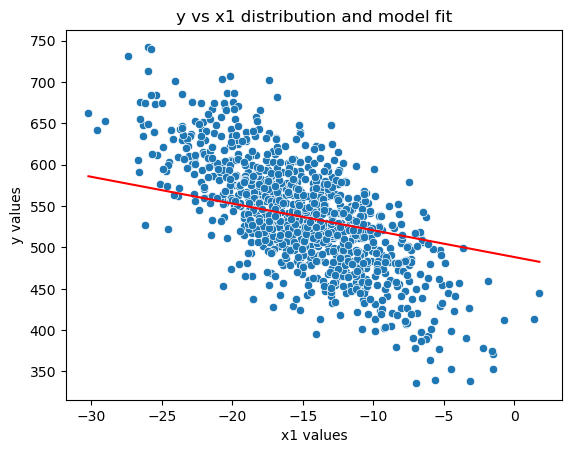

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


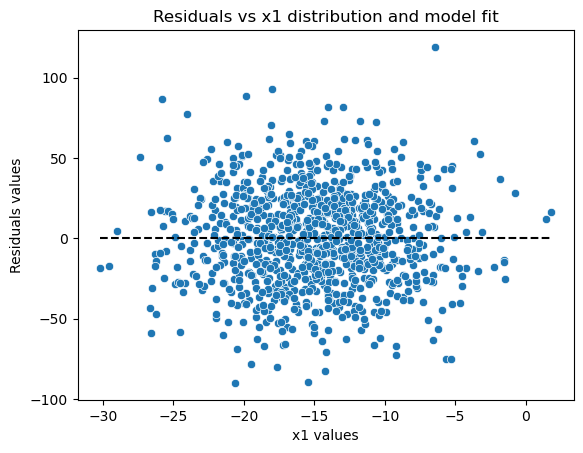

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


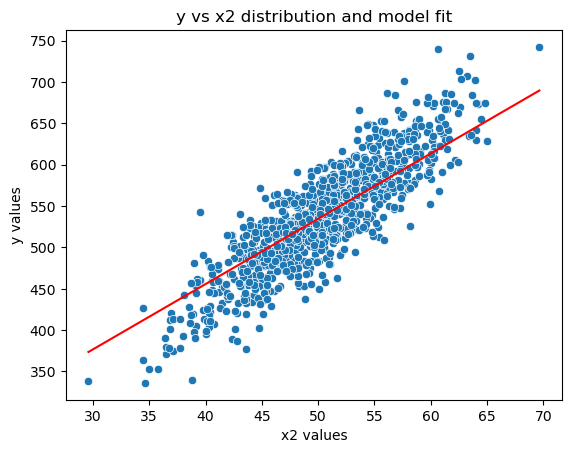

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


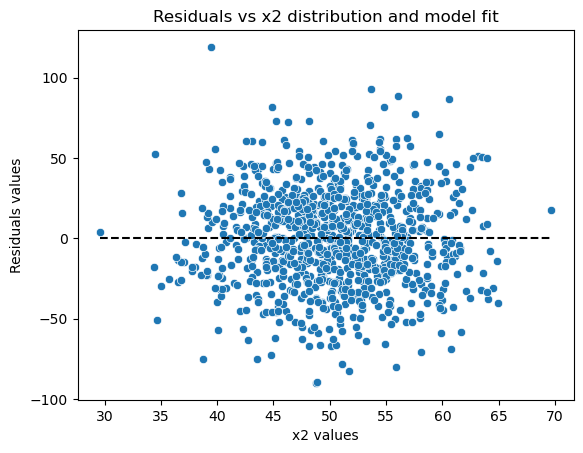

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


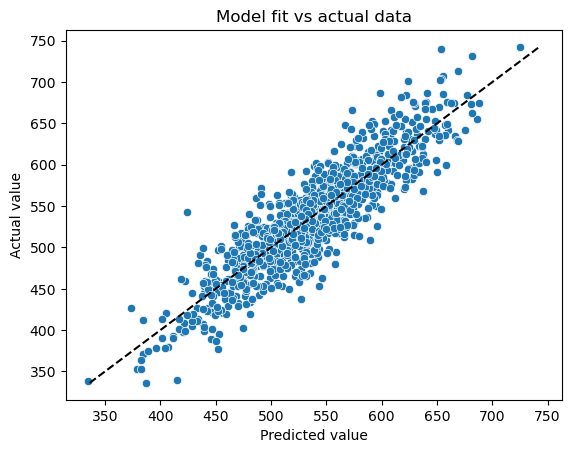

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


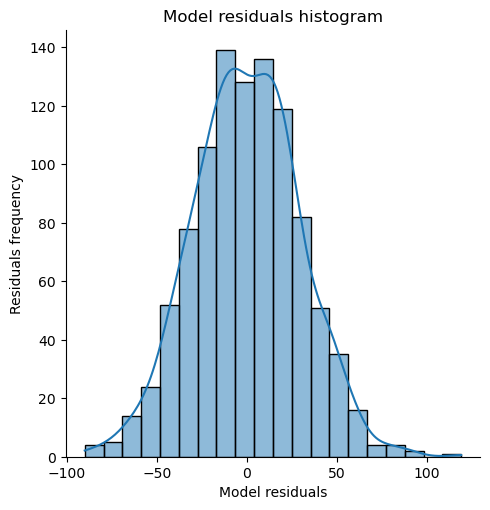

In [11]:
# Обучим модель и выведем результаты
dt_missing_var, model_missing_var = train_model(dt_missing_var, target='y', feature_names=['x1', 'x2'], show_results=True, return_norm_tests=False)

# ВЫВОДЫ 2.а

Что касается графиков y(x1), y(x2) - угол наклона (знаки) определены правильно, прямая проходит практически через центр облака точек. А также можно заметить, что регрессор 2 сильнее влияет на таргет. 

Графики остатков. Облако точек примерно равномерно вокруг нуля. Нет систематического изменения дисперсии остатков при росте/убывании, что свидетельствует о том, что модель хорошо улавливает линейную связь и предпосылка о постоянной дисперсии (гомоскедастичности) не выглядит нарушенной.

График  y vs ӯ. Точки расположены вокруг диагонали. Судя по графику, разброс относительно небольшой. Данный график указывает на то, что модель в целом дает хорошие предсказания: нет систематического смещения.

Гистограмма остатков. Форма распределения остатков близка к колоколообразной, что визуально соответствует нормальному распределению.
Нет ярко выраженной асимметрии или чрезмерных тяжелых хвостов.


## 2.b

Проведите симуляцию изменения результатов модели в зависимости от
размера выборки № (через цикл или параллельные вычисления) для N—|
30 ... 1000, сохраняя оценки и стандартные ошибки коэффициентов В1 и В2.

In [16]:

# Создадим список для сохранения результатов симуляции
sim_results = []

# Зададим диапазон размеров выборки: от 30 до 1000 с шагом 10
for N in range(30, 1001, 10):
    # Обновляем размер выборки в параметрах
    dist_params['N'] = N
    
    # Генерируем данные с помощью функции gen_data (устанавливаем тот же seed для воспроизводимости)
    dt = gen_data(y_type='simul', params=dist_params, seed=RANDOM_SEED)
    
    # Обучаем модель, используя функцию train_model (без вывода графиков и тестов)
    dt_model, model = train_model(dt, target='y', feature_names=['x1', 'x2'], 
                                  show_results=False, return_norm_tests=False)
    
    # Извлекаем оценки коэффициентов и их стандартные ошибки
    beta0 = model.params['const']
    beta1 = model.params['x1']
    beta2 = model.params['x2']
    se_beta0 = model.bse['const']
    se_beta1 = model.bse['x1']
    se_beta2 = model.bse['x2']
    
    # Сохраняем результаты для текущего N
    sim_results.append({
        'N': N,
        'beta0': beta0,
        'se_beta0': se_beta0,
        'beta1': beta1,
        'se_beta1': se_beta1,
        'beta2': beta2,
        'se_beta2': se_beta2
    })

# Преобразуем список результатов в DataFrame для удобного анализа
df_sim = pd.DataFrame(sim_results)
df_sim

,N,beta0,se_beta0,beta1,se_beta1,beta2,se_beta2
0,30,134.088386,56.082368,-2.355351,1.634692,7.295569,1.371379
1,40,97.637370,39.284045,-5.019664,1.130387,7.247534,0.946840
2,50,133.392421,44.093456,-3.392619,1.296555,6.968324,1.071392
3,60,111.586320,37.946622,-2.980095,1.174426,7.615044,0.935581
4,70,115.707389,35.435666,-3.877562,1.029455,7.295152,0.869531
...,...,...,...,...,...,...,...
93,960,107.754095,8.919481,-3.450889,0.263520,7.509965,0.218859
94,970,112.413066,8.899665,-3.324350,0.263066,7.450631,0.219063
95,980,88.736914,8.809427,-2.879719,0.258292,8.056931,0.216659
96,990,102.989044,8.831465,-2.926057,0.258263,7.756379,0.216885


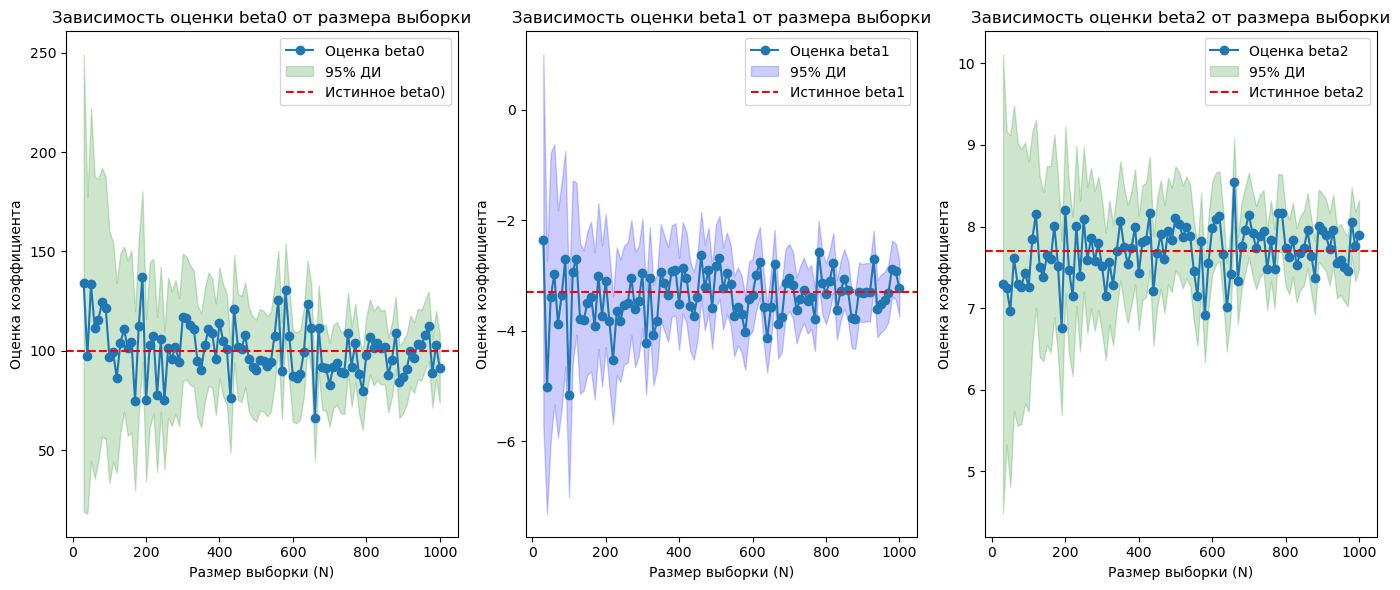

In [22]:

import scipy.stats as st

# Вычисляем критическое значение t для каждого размера выборки
df_sim['t_crit'] = df_sim['N'].apply(lambda n: st.t.ppf(1-0.05/2, df=n-3))

# Вычисляем нижнюю и верхнюю границу доверительного интервала для beta0, beta1 и beta2

df_sim['ci_lower_beta0'] = df_sim['beta0'] - df_sim['t_crit'] * df_sim['se_beta0']
df_sim['ci_upper_beta0'] = df_sim['beta0'] + df_sim['t_crit'] * df_sim['se_beta0']

df_sim['ci_lower_beta1'] = df_sim['beta1'] - df_sim['t_crit'] * df_sim['se_beta1']
df_sim['ci_upper_beta1'] = df_sim['beta1'] + df_sim['t_crit'] * df_sim['se_beta1']

df_sim['ci_lower_beta2'] = df_sim['beta2'] - df_sim['t_crit'] * df_sim['se_beta2']
df_sim['ci_upper_beta2'] = df_sim['beta2'] + df_sim['t_crit'] * df_sim['se_beta2']


plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.plot(df_sim['N'], df_sim['beta0'], label='Оценка beta0', marker='o', linestyle='-')
plt.fill_between(df_sim['N'], df_sim['ci_lower_beta0'], df_sim['ci_upper_beta0'], color='green', alpha=0.2, label='95% ДИ')
plt.axhline(y=dist_params['beta0'], color='red', linestyle='--', label='Истинное beta0)')
plt.xlabel('Размер выборки (N)')
plt.ylabel('Оценка коэффициента')
plt.title('Зависимость оценки beta0 от размера выборки')
plt.legend()

plt.subplot(1,3,2)
plt.plot(df_sim['N'], df_sim['beta1'], label='Оценка beta1', marker='o', linestyle='-')
plt.fill_between(df_sim['N'], df_sim['ci_lower_beta1'], df_sim['ci_upper_beta1'], color='blue', alpha=0.2, label='95% ДИ')
plt.axhline(y=dist_params['beta1'], color='red', linestyle='--', label='Истинное beta1')
plt.xlabel('Размер выборки (N)')
plt.ylabel('Оценка коэффициента')
plt.title('Зависимость оценки beta1 от размера выборки')
plt.legend()


plt.subplot(1,3,3)
plt.plot(df_sim['N'], df_sim['beta2'], label='Оценка beta2', marker='o', linestyle='-')
plt.fill_between(df_sim['N'], df_sim['ci_lower_beta2'], df_sim['ci_upper_beta2'], color='green', alpha=0.2, label='95% ДИ')
plt.axhline(y=dist_params['beta2'], color='red', linestyle='--', label='Истинное beta2')
plt.xlabel('Размер выборки (N)')
plt.ylabel('Оценка коэффициента')
plt.title('Зависимость оценки beta2 от размера выборки')
plt.legend()

plt.tight_layout()
plt.show()


# ВЫВОДЫ 2.с

На всех трех графиках видно, что при увеличении размера выборки 𝑁 оценки коэффициентов все ближе группируются вокруг истинного значения Это соответствует закону больших чисел: чем больше данных, тем точнее и стабильнее становятся оценки МНК.

Что касается сужения доверительных интервалов, то можно заметить заметное сужение по мере роста 𝑁. При малых выборках интервалы широкие, отражая высокую неопределенность оценок. При больших выборках доверительные интервалы становятся уже, что говорит о возрастающей точности и надежности оценок.

Также можно обратить внимание, что при малых 𝑁 происходят более сильные скачки и разброс оценок. С увеличением выборки эти колебания сглаживаются из-за уменьшения дисперсии оценок. 

Графики подтверждают, что при корректной спецификации модели и выполнении предпосылок метод наименьших квадратов дает несмещенные оценки, сходящиеся к истинным значениям по мере роста 𝑁. 



